In [1]:
import pickle as pkl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_inner, df_outer = pkl.load(open("sim_50.pkl", 'rb'))
hier_inner, hier_outer = pkl.load(open("sim_50_1_51.pkl", 'rb'))
df_inner = pd.concat([df_inner, hier_inner], axis=0)
df_outer = pd.concat([df_outer, hier_outer], axis=0)

In [4]:
df = df_outer.reset_index()
df = df[df['index'] == 'Test'].drop('index', axis=1)
res = df.groupby(['Type'])['Acc'].apply(lambda x: x.to_numpy())
res

Type
Hierachical    [0.81, 0.761, 0.807, 0.813, 0.823, 0.816, 0.81...
Latent         [0.836, 0.821, 0.825, 0.811, 0.82, 0.803, 0.81...
auto           [0.869, 0.876, 0.86, 0.879, 0.881, 0.861, 0.87...
group          [0.858, 0.855, 0.85, 0.856, 0.863, 0.852, 0.85...
inner          [0.639, 0.664, 0.622, 0.692, 0.67, 0.647, 0.72...
Name: Acc, dtype: object

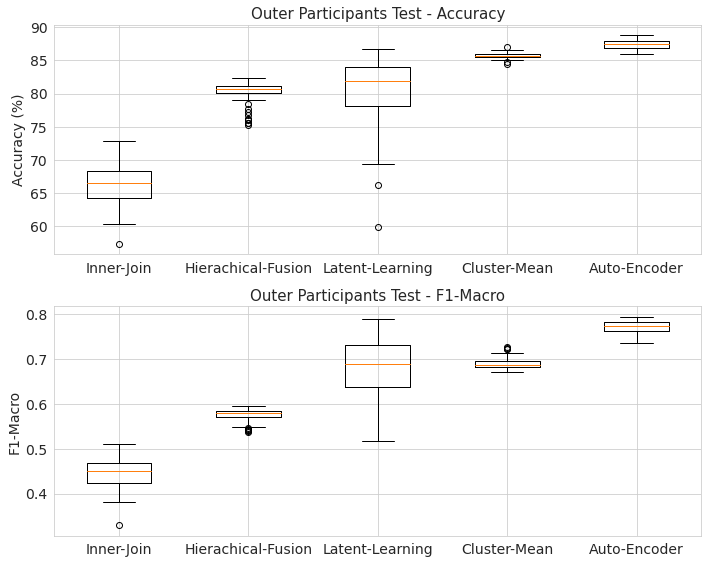

In [29]:
fig, axes = plt.subplots(2, 1, figsize = (10, 8))
df = df_outer.reset_index()
df = df[df['index'] == 'Test'].drop('index', axis=1)
res = df.groupby(['Type'])['Acc'].apply(lambda x: x.to_numpy())
sns.set_style('whitegrid')
axes[0].boxplot([res.inner * 100, res.Hierachical * 100, res.Latent * 100,  res.group * 100, res.auto * 100], 
            labels = ["Inner-Join", "Hierachical-Fusion", "Latent-Learning",  "Cluster-Mean", 'Auto-Encoder'])
axes[0].set_ylabel("Accuracy (%)", fontsize = 14)
axes[0].set_title("Outer Participants Test - Accuracy", fontsize = 15)
axes[0].tick_params(labelsize = 14)
# plt.show()

df = df_outer.reset_index()
df = df[df['index'] == 'Test'].drop('index', axis=1)
res = df.groupby(['Type'])['F1-macro'].apply(lambda x: x.to_numpy())
sns.set_style('whitegrid')
axes[1].boxplot([res.inner, res.Hierachical, res.Latent,  res.group, res.auto], 
            labels = ["Inner-Join", "Hierachical-Fusion", "Latent-Learning",  "Cluster-Mean", 'Auto-Encoder'])
axes[1].set_ylabel("F1-Macro", fontsize = 14)
axes[1].set_title("Outer Participants Test - F1-Macro", fontsize = 15)
axes[1].tick_params(labelsize = 14)
plt.tight_layout(pad=1.3)
plt.show()

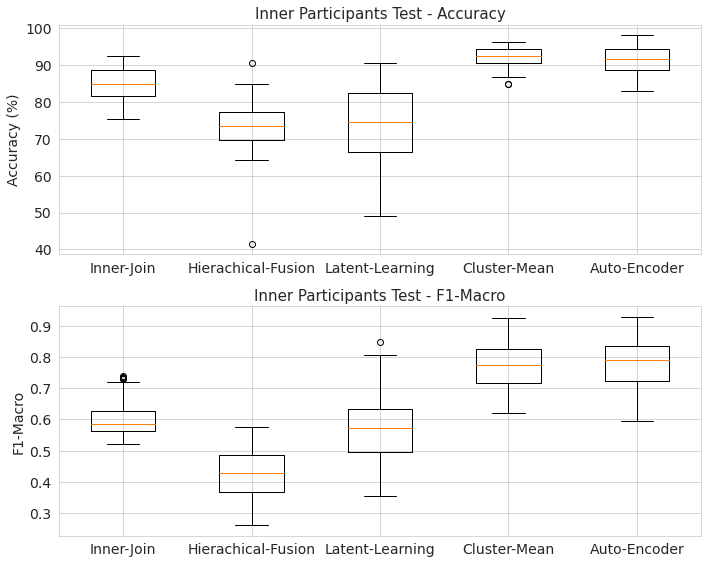

In [30]:
fig, axes = plt.subplots(2, 1, figsize = (10, 8))
df = df_inner.reset_index()
df = df[df['index'] == 'Test'].drop('index', axis=1)
res = df.groupby(['Type'])['Acc'].apply(lambda x: x.to_numpy())
sns.set_style('whitegrid')
axes[0].boxplot([res.inner * 100, res.Hierachical * 100, res.Latent * 100,  res.group * 100, res.auto * 100], 
            labels = ["Inner-Join", "Hierachical-Fusion", "Latent-Learning",  "Cluster-Mean", 'Auto-Encoder'])
axes[0].set_ylabel("Accuracy (%)", fontsize = 14)
axes[0].set_title("Inner Participants Test - Accuracy", fontsize = 15)
axes[0].tick_params(labelsize = 14)
# plt.show()

df = df_inner.reset_index()
df = df[df['index'] == 'Test'].drop('index', axis=1)
res = df.groupby(['Type'])['F1-macro'].apply(lambda x: x.to_numpy())
sns.set_style('whitegrid')
axes[1].boxplot([res.inner, res.Hierachical, res.Latent,  res.group, res.auto], 
            labels = ["Inner-Join", "Hierachical-Fusion", "Latent-Learning",  "Cluster-Mean", 'Auto-Encoder'])
axes[1].set_ylabel("F1-Macro", fontsize = 14)
axes[1].set_title("Inner Participants Test - F1-Macro", fontsize = 15)
axes[1].tick_params(labelsize = 14)
plt.tight_layout(pad=1.3)
plt.show()